In [95]:
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv("NHL_20132014_processed.csv")
df2 = pd.read_csv("NHL_20132014.csv") 
X = df[[k for k in df.columns if k!='score']].to_numpy().astype(np.int) #This bit seems like it doesn't work anymore?  was between df and .astype
y = df[['score']].to_numpy().astype(np.int) # likewise. Fun fact. This isn't actually importing as int

m = len(X)
n = len(X[0])

# Organize feature vector such that it has form  (home team #, away team #, homeflag). I believe this is all wrong and should be ignored for now
#feature_X = np.zeros((m,3));
#count = 0;
#for i in range(m):
#    if i % 2 == 0:
#        for j in range(n-1):
#            for j2 in range(n-1):
#                if (X[i][j] == 1 and X[i+1][j2] == 1):
#                    feature_X[i][0] = j;
#                    feature_X[i][1] = j2;
#                    feature_X[i][2] = X[i][-1];
#                        
#                    feature_X[i+1][0] = j;
#                    feature_X[i+1][1] = j2;
#                    feature_X[i+1][2] = X[i+1][-1]

# Find team number for Phoenix and Dallas
# PHX = df.columns.get_loc('PHX')
# DAL = df.columns.get_loc('DAL')

# As far as I can tell, I already have the necessary feature vectors in X and the necessary targets in y.
print(X[1])

#test = np.dot(X[0,:], theta)
#nll = 0
#for j in range(n):
#    nll += X[0,j]*theta[j]
#print(nll, test)
print(len(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
2460


In [97]:
%%time
# Implement a short code to minimize Eq. (5) using gradient descent.
# This current code only has three features. This is bad! We are assuming linear differences between teams by assigning them 
# 0, 1, 2, 3, etc! But this might now (likely isn't) the case! Instead, use the one-hot as provided. 
# This will give 30 team parameters and one home/away flag parameter. From this, team strength and home advantage can be 
# accounted for, though 'team strength' will be a black box.

#M = len(feature_X)
#N = len(feature_X[0])


# Initialize theta
theta = np.random.uniform(low=-0.1,high=0.1, size=(n,1)) 


def gradient(X,y,theta):
    grad_theta = 0;
    XT = np.transpose(X);         
    grad_theta += -np.dot(XT, (y-np.exp(np.dot(X,theta)))) # Should be an array with length equal to theta
    return(grad_theta)

def negative_loglikelihood(X,y,theta):
    nll = 0;
    for i in range(m):
        nll += -y[i]*np.dot(X[i,:],theta) + np.exp(np.dot(X[i,:],theta)) + np.log(np.math.factorial(y[i, 0]))
    return(nll)        
                                         

# Iterate and update theta by using the gradient of the negative log-likelihood
max_iter = 600
learning_rate = 1e-4

iteration = [];
loglike = [];
for i in range(max_iter):

# Calculate the gradient
    dtheta = gradient(X,y,theta)
    
# Update theta
    theta = theta - learning_rate * dtheta
    
# Calculate the value of the log-likelihood
    cost = negative_loglikelihood(X,y,theta)
    iteration.append(i+1);
    loglike.append(cost);
    print(
        "Iteration %d, cost function %.3f" % (i+1,cost))

Iteration 1, cost function 6156.678
Iteration 2, cost function 5825.230
Iteration 3, cost function 5604.142
Iteration 4, cost function 5466.658
Iteration 5, cost function 5385.524
Iteration 6, cost function 5338.431
Iteration 7, cost function 5310.044
Iteration 8, cost function 5291.188
Iteration 9, cost function 5276.938
Iteration 10, cost function 5264.855
Iteration 11, cost function 5253.795
Iteration 12, cost function 5243.246
Iteration 13, cost function 5232.981
Iteration 14, cost function 5222.903
Iteration 15, cost function 5212.971
Iteration 16, cost function 5203.165
Iteration 17, cost function 5193.478
Iteration 18, cost function 5183.904
Iteration 19, cost function 5174.442
Iteration 20, cost function 5165.090
Iteration 21, cost function 5155.846
Iteration 22, cost function 5146.709
Iteration 23, cost function 5137.679
Iteration 24, cost function 5128.753
Iteration 25, cost function 5119.931
Iteration 26, cost function 5111.212
Iteration 27, cost function 5102.594
Iteration 

Iteration 220, cost function 4496.853
Iteration 221, cost function 4496.327
Iteration 222, cost function 4495.810
Iteration 223, cost function 4495.302
Iteration 224, cost function 4494.802
Iteration 225, cost function 4494.311
Iteration 226, cost function 4493.828
Iteration 227, cost function 4493.354
Iteration 228, cost function 4492.887
Iteration 229, cost function 4492.429
Iteration 230, cost function 4491.978
Iteration 231, cost function 4491.535
Iteration 232, cost function 4491.100
Iteration 233, cost function 4490.672
Iteration 234, cost function 4490.252
Iteration 235, cost function 4489.839
Iteration 236, cost function 4489.432
Iteration 237, cost function 4489.033
Iteration 238, cost function 4488.641
Iteration 239, cost function 4488.256
Iteration 240, cost function 4487.877
Iteration 241, cost function 4487.505
Iteration 242, cost function 4487.139
Iteration 243, cost function 4486.779
Iteration 244, cost function 4486.426
Iteration 245, cost function 4486.079
Iteration 24

Iteration 436, cost function 4467.685
Iteration 437, cost function 4467.675
Iteration 438, cost function 4467.665
Iteration 439, cost function 4467.656
Iteration 440, cost function 4467.647
Iteration 441, cost function 4467.638
Iteration 442, cost function 4467.629
Iteration 443, cost function 4467.620
Iteration 444, cost function 4467.611
Iteration 445, cost function 4467.603
Iteration 446, cost function 4467.595
Iteration 447, cost function 4467.587
Iteration 448, cost function 4467.579
Iteration 449, cost function 4467.571
Iteration 450, cost function 4467.563
Iteration 451, cost function 4467.556
Iteration 452, cost function 4467.549
Iteration 453, cost function 4467.542
Iteration 454, cost function 4467.534
Iteration 455, cost function 4467.528
Iteration 456, cost function 4467.521
Iteration 457, cost function 4467.514
Iteration 458, cost function 4467.508
Iteration 459, cost function 4467.501
Iteration 460, cost function 4467.495
Iteration 461, cost function 4467.489
Iteration 46

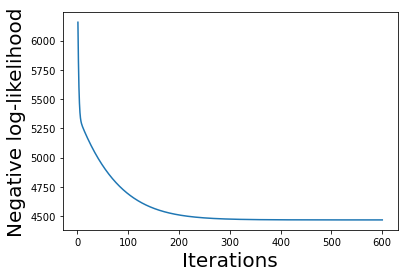

In [98]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(iteration, loglike)
plt.xlabel('Iterations',fontsize=20)
plt.ylabel("Negative log-likelihood",fontsize=20)

plt.savefig('loglikeli.png',bbox_inches='tight')
plt.show()


In [99]:
def poisson(lmbd,y):
    return np.power(lmbd,y) * np.exp(-lmbd) / np.math.factorial(y)

lmbdfor = 0;
lmbdaway = 0;

home = X[-2]
away = X[-1]

# Lets just work out a single team's distribution to start

lmbdhome = np.dot(home, theta)
lmbdaway = np.dot(away, theta)
print(lmbdhome, lmbdaway)

goals_for_prob = np.zeros(10)
goals_away_prob = np.zeros(10)
prob = np.zeros((10,10))
probwin = 0
probloss = 0

for i in range(10):
    goals_for_prob[i] = poisson(lmbdhome, i)
    goals_away_prob[i] = poisson(lmbdaway,i)
    for j in range(10):
        prob[i][j] = poisson(lmbdhome, i)*poisson(lmbdaway, j)
        if i > j: # win in regulation
            probwin += prob[i][j]
        if i < j: # loss in regulation
            probloss += prob[i][j]

#for i in range(N):
#    lmbdfor += np.exp(v[0][i]*theta[i])   [PHX, DAL, home_flag]*[theta_1, theta_2, theta_3]? This doesn't make sense
#    lmbdaway += np.exp(v[1][i]*theta[i])
    
    

#prob = np.zeros((10,10));    
#probwin = 0;
#goalsforprob = np.zeros(10);
#goalsagainstprob = np.zeros(10);
#for i in range(10):
#    goalsforprob[i] = poisson(lmbdfor,i);
#    goalsagainstprob[i] = poisson(lmbdaway,i);
#    for j in range(10):
#        prob[i][j] = poisson(lmbdfor,i)*poisson(lmbdaway,j);
#        if i > j:  # Win in regulation
       # if i >= j: #Win in regulation or go to OT
#            probwin += prob[i][j];

prob_OT = 1-probwin-probloss

print('Probability of HOME winning the hockey game:', probwin)
print('Probability of AWAY winning the hockey game:', probloss)
print('Probability of OT:', prob_OT)


[0.98064867] [0.97552469]
Probability of HOME winning the hockey game: 0.3450188950323819
Probability of AWAY winning the hockey game: 0.34231059684888443
Probability of OT: 0.31267050811873365


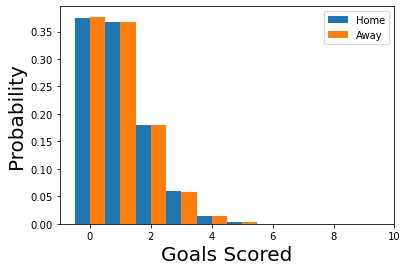

In [100]:
plt.figure()
goals = np.array([0,1,2,3,4,5,6,7,8,9]);

barwidth = 0.5;
plt.bar(goals-0.25, goals_for_prob, barwidth, label='Home')
plt.bar(goals+0.25, goals_away_prob, barwidth, label = 'Away')
plt.xlabel('Goals Scored',fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.legend()


plt.savefig('goals.png',bbox_inches='tight')
plt.show()

In [101]:
# Okay. Right now the model is not predicting enough goals.
# It's convereged so maybe that's just the best that it can do with this dataset? It is a very crude model and I still
# haven't double checked that the math is 100% legit. Good news: It knows that Buffalo is trash. 
# Let's calculate and print probabilities for each game in the season, which can then be used in the Monte Carlo code


half = np.int(m/2)
num_prob = 3
prob_array = np.zeros([half, num_prob])

for i in range(half):
    j = 2*i
    home = X[j]
    away = X[j+1]
    
    lmbdhome = np.dot(home, theta)
    lmbdaway = np.dot(away, theta)
    
    goals_for_prob = np.zeros(10)
    goals_away_prob = np.zeros(10)
    prob = np.zeros((10,10))
    probwin = 0
    probloss = 0
    
    for k in range(10):
        goals_for_prob[k] = poisson(lmbdhome, k)
        goals_away_prob[k] = poisson(lmbdaway,k)
        for l in range(10):
            prob[k][l] = poisson(lmbdhome, k)*poisson(lmbdaway, l)
            if k > l: # win in regulation
                probwin += prob[k][l]
            if k < l: # loss in regulation
                probloss += prob[k][l]
    prob_OT = 1-probwin-probloss
    #print(probwin, probloss, prob_OT)
    prob_array[i] = probwin, probloss, prob_OT

# Save this into a comma delimited file
# Sanity check: np.savetxt overwrites an existing file. It does not add data to end of file if file already exists. 
# Not tested: Does it overwrite line by line? Or delete all and start fresh file? Could be a problem if it's line by line
np.savetxt('game_probs.csv', prob_array, 
           fmt='%5.2f', header="Home Win, Home Lose, OT", delimiter=',')